
# Comments on what this notebook does:

+ Loading of different data sets 
+ Declaration of data for the pipelin

# Pipeline for the preparation
+ Fill missing nans with mean of column
+ Get rid of the last remaining columns which seem non relevant 
+ One hot encoding 
+ Droping of category columns 
+ Label Encoding of IT column -> Mapping of categorical variables with many Items 
+ Scaler 
+ Test Train split 

# Models 
+ making of the models 
+ training of the models 
+ prediction with the models 

# Evaluation of Models 
+ RMSE 
+ Residuents 
 

# Import Libraries

In [26]:
# First of all import the required libraries 
# Data and math  
import pandas as pd
import numpy as np 
import pyarrow.parquet as pq

# Visualisation 
import matplotlib.pyplot as plt  # für Matplotlib
import seaborn as sns            # für Seaborn
import plotly.express as px      # für Plotly Express
#%matplotlib inline

# Import System Libraries 
import warnings
import os
# Ignor all warnings, because there is a front problem with mach 
warnings.filterwarnings("ignore")

# Import Machine Learning libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [27]:
# Importing Data 
# Path to the neighboring 'data' folder
data_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data'))


In [28]:

# Big Dataframe 
df_big = pd.read_csv(os.path.join(data_path, 'EU_Tillmann_Big.csv'))
print("Shape of tillmanns big df:", df_big.shape)
print(df_big.head())

# Big Diesel only Dataframe 
df_diesel = pd.read_csv(os.path.join(data_path, 'EU_Tillmann_Diesel.csv'))
print("Shape of tillmanns diesel df:", df_diesel.shape)
print(df_diesel.head())

# Big Petrol only Dataframe 
df_petrol = pd.read_csv(os.path.join(data_path, 'EU_Tillmann_Petrol.csv'))
print("Shape of tillmanns petrol df:", df_petrol.shape)
print(df_petrol.head())


Shape of tillmanns big df: (8095869, 21)
       Mk  Ct  Cr  m (kg)      Mt  Ewltp (g/km)  W (mm)  At1 (mm)  At2 (mm)  \
0  SUZUKI  M1  M1  1045.0  1151.0         135.0  2450.0    1510.0    1515.0   
1  SUZUKI  M1  M1   915.0  1051.0         115.0  2450.0    1530.0    1530.0   
2  SUZUKI  M1  M1   915.0  1051.0         115.0  2450.0    1520.0    1520.0   
3   SKODA  M1  M1  1560.0     NaN         146.0  2836.0    1578.0    1566.0   
4     BMW  M1  M1  1490.0  1578.0         149.0  2670.0    1563.0    1562.0   

       Ft  ... ec (cm3)  ep (KW)  z (Wh/km)      IT  De   Vf  ech  RLFI  \
0  PETROL  ...   1373.0    103.0        NaN     NaN NaN  0.0  NaN   NaN   
1  PETROL  ...   1242.0     66.0        NaN     NaN NaN  0.0  NaN   NaN   
2  PETROL  ...   1242.0     66.0        NaN     NaN NaN  0.0  NaN   NaN   
3  DIESEL  ...   1968.0    110.0        NaN     NaN NaN  0.0  NaN   NaN   
4  PETROL  ...   1499.0    103.0        NaN  e24 19 NaN  0.0  NaN   NaN   

   Electric range (km)  #identica

In [29]:

# Big Diesel only Dataframe 
df_small = pd.read_csv(os.path.join(data_path, 'EU_Tillmann_Small.csv'))
print("Shape of tillmanns small df:", df_small.shape)
print(df_small.head())

# Big Petrol only Dataframe 
df_smallsmall = pd.read_csv(os.path.join(data_path, 'EU_Tillmann_SmallSmall.csv'))
print("Shape of tillmanns small small df:", df_smallsmall.shape)
print(df_smallsmall.head())

Shape of tillmanns small df: (80959, 21)
           Mk   Ct   Cr  m (kg)      Mt  Ewltp (g/km)  W (mm)  At1 (mm)  \
0         BMW   M1   M1  1920.0  2067.0         191.0  2975.0    1599.0   
1  VOLKSWAGEN   M1   M1  1567.0  1694.0         129.0  2786.0    1578.0   
2         BMW  M1G  M1G  1910.0  2107.0         159.0  2864.0    1620.0   
3       SKODA   M1   M1  1686.0  1847.0         163.0  2788.0    1585.0   
4       SKODA  M1G  M1G  1772.0  1941.0         182.0  2788.0    1566.0   

   At2 (mm)      Ft  ... ec (cm3)  ep (KW)  z (Wh/km)         IT  De   Vf  \
0    1624.0  DIESEL  ...   2993.0    235.0        NaN      E24 9 NaN  0.0   
1    1578.0  DIESEL  ...   1968.0     90.0        NaN  e13 17 19 NaN  NaN   
2    1636.0  DIESEL  ...   1995.0    140.0        NaN   E24 3 27 NaN  NaN   
3    1575.0  DIESEL  ...   1968.0    110.0        NaN        NaN NaN  NaN   
4    1576.0  DIESEL  ...   1968.0    140.0        NaN      E8 19 NaN  NaN   

   ech  RLFI  Electric range (km)  #identical

In [30]:
# Declare df for ML data preparation pipeline 
data = df_diesel

# 1. Handle missing values (if any)


In [31]:

# Fill missing values with the mean of the column
data.fillna(data.mean(), inplace=True)


In [32]:
# Delete columns without meaning for the model
data.head()
print(data.columns)
list_columns_drop = ['Mk', 'Cr', 'ech', 'RLFI', '#identical occurences']
data.drop(list_columns_drop, axis=1, inplace=True)


Index(['Mk', 'Ct', 'Cr', 'm (kg)', 'Mt', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)',
       'At2 (mm)', 'Fm', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'De', 'Vf',
       'ech', 'RLFI', 'Electric range (km)', '#identical occurences'],
      dtype='object')


In [33]:
print(data.columns)

Index(['Ct', 'm (kg)', 'Mt', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)',
       'Fm', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'De', 'Vf',
       'Electric range (km)'],
      dtype='object')


In [34]:
# List of problematic categorical columns
columns_category = ['Ct', 'Ft', 'Fm', 'IT']

# Loop through each column and print unique values
for col in columns_category:
    if col in data.columns:
        unique_values = data[col].unique()
        print(f"Unique values in column '{col}':\n{unique_values}\n")
    else:
        print(f"Column '{col}' does not exist in the DataFrame, skipping...\n")

Unique values in column 'Ct':
['M1' 'M1G' 'N1' 'N1G' nan 'N2G' 'N2']

Column 'Ft' does not exist in the DataFrame, skipping...

Unique values in column 'Fm':
['M' 'F' 'H' 'P']

Unique values in column 'IT':
[nan 'e24 9 10' 'e24 9' 'E1 2' 'e11 19' 'e13 19' 'e24 3 9' 'e24 19'
 'e24 19 9' 'e1 8' 'E24 19' 'e1 2' 'e1 9' 'E1 8' 'e24 10' 'E1 9' 'e9 19'
 'e24 9 19' 'e1 19' 'e24 10 9' 'e 24 9' 'e 24 9 19' 'e6 19' 'e3 17 19'
 'e24 3 9 10' 'E13 19' 'E 13 19' 'E24 10' 'E24 9' 'E24 9 19' 'E24 9 10'
 'E19' 'E9 19' 'E11 19' 'E1 19' '19' 'E24 3 9 10' 'E24 3 9' 'e11*19'
 'e24*9' 'e24*19' 'e1*10' 'e1*2' 'E1 10' 'e2 4' 'E6 19' 'e19' 'e1 2 '
 'e29 9 19' 'e1 9  ' 'e1 2  ' 'e2 22' 'e2 17' 'e9 17' 'e3 17' 'e5 17'
 'e13 17 19 low' 'e24 17 19' 'e24 17' 'e13 17 19 mid' 'e8 19' 'e8 17 19'
 'e24 17 19 25' 'e24 10 17' 'e24 3 17' 'e24 3 17 19' 'e13 17' 'e24 3 19'
 'e24 3' 'e2 17 e9 17' 'e3 19' 'e1 17' 'e2 19' 'e24 3 10' 'e9 17 19'
 'e24 3 17 19 25' 'e24 17 25' 'e4 17' 'e6 15' 'e4 19' 'e24 3 9 19'
 'e11 17' 'e13 17 

# 2. One-hot encode categorical variables

In [35]:
# List of columns to be one-hot encoded
columns_to_encode = ['Ct', 'Ft', 'Fm']

# Filter only the columns that exist in the DataFrame
existing_columns_to_encode = [col for col in columns_to_encode if col in data.columns]

if existing_columns_to_encode:
    # Initialize the OneHotEncoder
    encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity

    # Fit and transform the existing columns
    encoded_features = encoder.fit_transform(data[existing_columns_to_encode])

    # Convert the encoded features into a DataFrame with meaningful column names
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(existing_columns_to_encode))

    # Concatenate the new one-hot encoded columns back to the original DataFrame (drop the original columns first)
    data = pd.concat([data.drop(existing_columns_to_encode, axis=1), encoded_df], axis=1)

    # Display the updated DataFrame
    print(data.head())
else:
    print("No columns to encode were found in the DataFrame.")



   m (kg)           Mt  Ewltp (g/km)  W (mm)  At1 (mm)  At2 (mm)  ec (cm3)  \
0  1560.0  1906.904595         146.0  2836.0    1578.0    1566.0    1968.0   
1  1560.0  1906.904595         147.0  2836.0    1578.0    1566.0    1968.0   
2  1560.0  1906.904595         144.0  2836.0    1578.0    1566.0    1968.0   
3  1845.0  2001.000000         191.0  2832.0    1622.0    1626.0    1968.0   
4  1845.0  1998.000000         191.0  2832.0    1622.0    1626.0    1968.0   

   ep (KW)  z (Wh/km)   IT  ...  Electric range (km)  Ct_M1G  Ct_N1  Ct_N1G  \
0    110.0     241.05  NaN  ...               42.275     0.0    0.0     0.0   
1    110.0     241.05  NaN  ...               42.275     0.0    0.0     0.0   
2    110.0     241.05  NaN  ...               42.275     0.0    0.0     0.0   
3    140.0     241.05  NaN  ...               42.275     0.0    0.0     0.0   
4    140.0     241.05  NaN  ...               42.275     0.0    0.0     0.0   

   Ct_N2  Ct_N2G  Ct_nan  Fm_H  Fm_M  Fm_P  
0    0.0   

In [36]:
# Save in between
df_new1 = data


# 3 Label Encoding of IT column 

In [37]:
# Get unique values in 'IT' column
unique_IT_values = data['IT'].unique()

# Create a mapping from categorical values to numerical values
IT_mapping = {category: idx for idx, category in enumerate(unique_IT_values)}

# Print the mapping (for reference)
print("Mapping of IT categories to numerical values:")
print(IT_mapping)

# Apply the mapping to the 'IT' column
data['IT_mapped'] = data['IT'].map(IT_mapping)

# Now 'IT_mapped' will contain the numerical representation of the 'IT' column
print(data[['IT', 'IT_mapped']].head())

# Later, to reverse the mapping, you can do:
reverse_IT_mapping = {v: k for k, v in IT_mapping.items()}

Mapping of IT categories to numerical values:
{nan: 0, 'e24 9 10': 1, 'e24 9': 2, 'E1 2': 3, 'e11 19': 4, 'e13 19': 5, 'e24 3 9': 6, 'e24 19': 7, 'e24 19 9': 8, 'e1 8': 9, 'E24 19': 10, 'e1 2': 11, 'e1 9': 12, 'E1 8': 13, 'e24 10': 14, 'E1 9': 15, 'e9 19': 16, 'e24 9 19': 17, 'e1 19': 18, 'e24 10 9': 19, 'e 24 9': 20, 'e 24 9 19': 21, 'e6 19': 22, 'e3 17 19': 23, 'e24 3 9 10': 24, 'E13 19': 25, 'E 13 19': 26, 'E24 10': 27, 'E24 9': 28, 'E24 9 19': 29, 'E24 9 10': 30, 'E19': 31, 'E9 19': 32, 'E11 19': 33, 'E1 19': 34, '19': 35, 'E24 3 9 10': 36, 'E24 3 9': 37, 'e11*19': 38, 'e24*9': 39, 'e24*19': 40, 'e1*10': 41, 'e1*2': 42, 'E1 10': 43, 'e2 4': 44, 'E6 19': 45, 'e19': 46, 'e1 2 ': 47, 'e29 9 19': 48, 'e1 9  ': 49, 'e1 2  ': 50, 'e2 22': 51, 'e2 17': 52, 'e9 17': 53, 'e3 17': 54, 'e5 17': 55, 'e13 17 19 low': 56, 'e24 17 19': 57, 'e24 17': 58, 'e13 17 19 mid': 59, 'e8 19': 60, 'e8 17 19': 61, 'e24 17 19 25': 62, 'e24 10 17': 63, 'e24 3 17': 64, 'e24 3 17 19': 65, 'e13 17': 66, 'e24 3 19

In [40]:
data.head()
print(data.columns)

Index(['m (kg)', 'Mt', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'De', 'Vf',
       'Electric range (km)', 'Ct_M1G', 'Ct_N1', 'Ct_N1G', 'Ct_N2', 'Ct_N2G',
       'Ct_nan', 'Fm_H', 'Fm_M', 'Fm_P', 'IT_mapped'],
      dtype='object')


In [41]:
# List of columns to be deleted
list_columns_drop2 = ['IT', 'Ft_nan']

# Filter only the columns that exist in the DataFrame
existing_columns_to_drop = [col for col in list_columns_drop2 if col in data.columns]

# Drop the existing columns
if existing_columns_to_drop:
    data.drop(existing_columns_to_drop, axis=1, inplace=True)
    print(f"Dropped columns: {existing_columns_to_drop}")
else:
    print("No columns to drop were found in the DataFrame.")

# Display the updated DataFrame
print(data.head())

Dropped columns: ['IT']
   m (kg)           Mt  Ewltp (g/km)  W (mm)  At1 (mm)  At2 (mm)  ec (cm3)  \
0  1560.0  1906.904595         146.0  2836.0    1578.0    1566.0    1968.0   
1  1560.0  1906.904595         147.0  2836.0    1578.0    1566.0    1968.0   
2  1560.0  1906.904595         144.0  2836.0    1578.0    1566.0    1968.0   
3  1845.0  2001.000000         191.0  2832.0    1622.0    1626.0    1968.0   
4  1845.0  1998.000000         191.0  2832.0    1622.0    1626.0    1968.0   

   ep (KW)  z (Wh/km)        De  ...  Ct_M1G  Ct_N1  Ct_N1G  Ct_N2  Ct_N2G  \
0    110.0     241.05  0.050474  ...     0.0    0.0     0.0    0.0     0.0   
1    110.0     241.05  0.050474  ...     0.0    0.0     0.0    0.0     0.0   
2    110.0     241.05  0.050474  ...     0.0    0.0     0.0    0.0     0.0   
3    140.0     241.05  0.050474  ...     0.0    0.0     0.0    0.0     0.0   
4    140.0     241.05  0.050474  ...     0.0    0.0     0.0    0.0     0.0   

   Ct_nan  Fm_H  Fm_M  Fm_P  IT_mapped


# 4. Split the data into features and target



In [42]:
# 
X = data.drop('Ewltp (g/km)', axis=1)  # Features
y = data['Ewltp (g/km)']               # Target variable




In [43]:

# 4. Normalize/Standardize features (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features by removing the mean and scaling to unit variance




In [44]:

# 5. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [45]:

# 6. Train a regression model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [46]:

# 7. Make predictions on the test set
y_pred = model.predict(X_test)


In [47]:

# 8. Evaluate the model performance (using Mean Squared Error in this case)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 566.8345337902826


In [ ]:
# This error is quite large if we consider a range of 10 to 600
# 305 MSE bei DF all small 
# bei only Diesel -> MSE: 566 

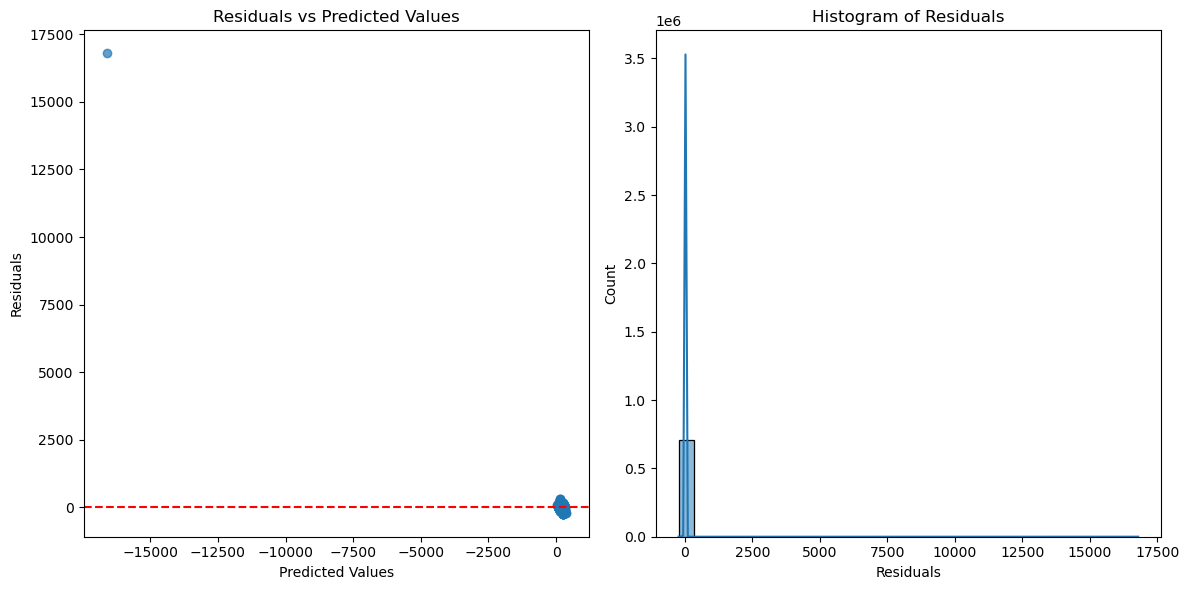

In [48]:

# Calculate residuals
residuals = y_test - y_pred

# Create a figure
plt.figure(figsize=(12, 6))

# Scatter plot of residuals vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True)  # Kernel Density Estimate for smoother curve
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
# I have to get rid of the outliers, there should be a quantile transformation before head 